### ALLLIFE BANK CREDIT CARD CUSTOMER SEGMENTATION

DATA: 

* VARIOUS CUSTOMERS OF BANK
* CUSTOMERS' CREDIT LIMIT
* CUSTOMERS' TOTAL NUMBER CREDIT CARDS
* DIFFERENT CONTACT CHANNELS FOR QUERIES (BANK VISITS, ONLINE, CALL CENTRE)


KEY FOCUS

* DIFFERENT SEGMENTS OF CUSTOMERS
* DIFFERENCES BETWEEN SEGMENTS 

In [1]:
### LIBRARIES

import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np 

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [2]:
### READ DATASET
df=pd.read_excel('Credit Card Customer Data.xlsx')

In [4]:
### VIEW 
### (2) - TOP TWO ROWS

df.head(2)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9


In [5]:
# SI_NO & CUSTOMER KEY ARE UNIQUE VARIABLES
# REMOVE SI_NO & CUSTOMER KEY AS THEY WILL NOT PLAY ANY NECESSARY ROLE IN CLUSTERING

In [6]:
cols_to_consider=['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

In [7]:
subset=df[cols_to_consider]

In [8]:
#### EDA ####

In [9]:
### MISSING VALUE CHECK
subset.isna().sum() 

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [10]:
# NO MISSING VALUES IN DATA

In [11]:
subset.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [12]:
# AVG_CREDIT_LIMIT MIN & MAX SUBSTANTIALLY LARGER THAN OTHER VARIABLES
# DATA MUST BE STANDARDIZED IN ORDER TO BE EQUAL IN SCALE

In [13]:
### Z-SCORE -> STANDARD SCALER

scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset)   

In [17]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)
subset_scaled_df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.195465e-16,-4.006223e-15,1.157323e-16,1.944572e-16,-7.112156e-16
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-1.473731e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-8.604506e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.471705e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,9.793898e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,1.592670e+00,4.224968e+00,2.241125e+00


In [18]:
#### VIZUALISATION OF DATA ####

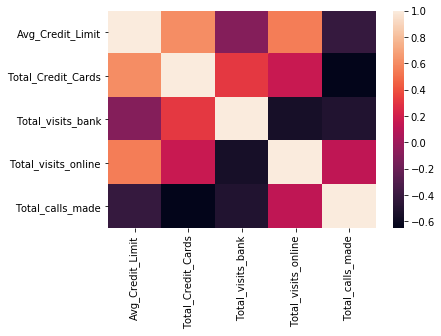

In [19]:
### CORRELATION HEATMAP
sns.heatmap(subset_scaled_df.corr())

In [20]:
# NO SIGNIFICANT CORRELATIONS

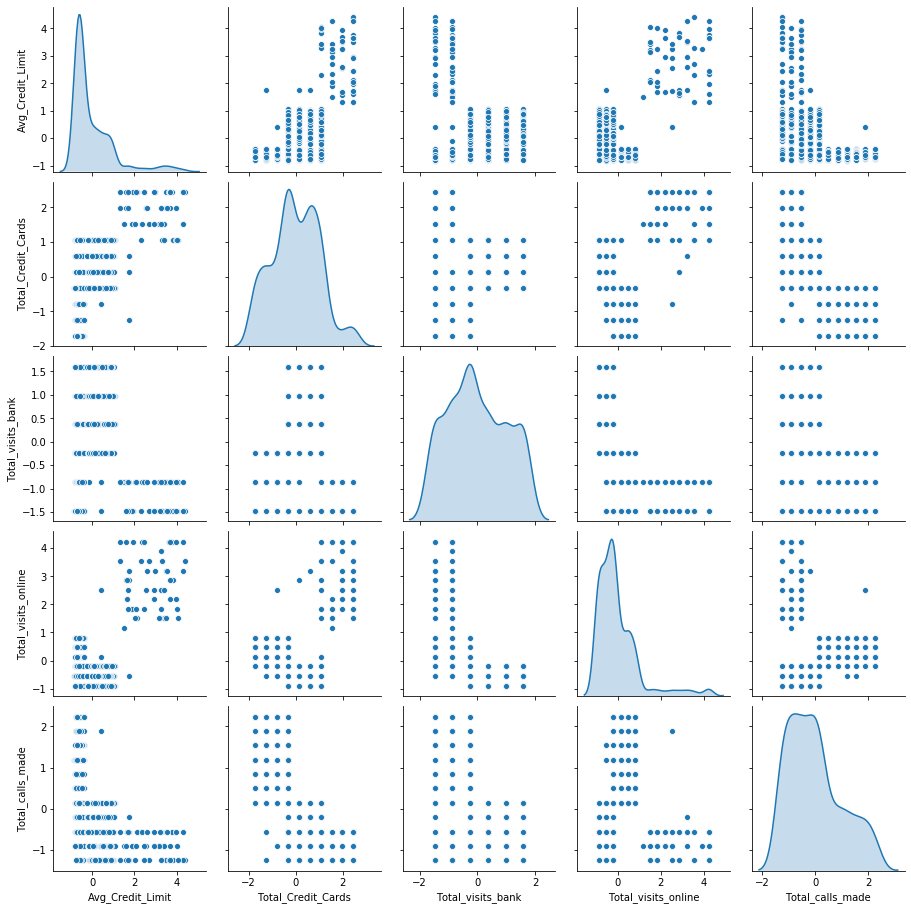

In [21]:
### PAIRPLOT
sns.pairplot(subset_scaled_df,diag_kind="kde")

In [22]:
# DATA SEEMS TO BE A MIXTURE OF GAUSSIANS

1 2.006922226250361
2 1.4571553548514269
3 1.1466276549150365
4 1.0463825294774463
5 0.990772333470802
6 0.9430843103448059
7 0.9095950026993534
8 0.8904653031471276
9 0.8678121616064918


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

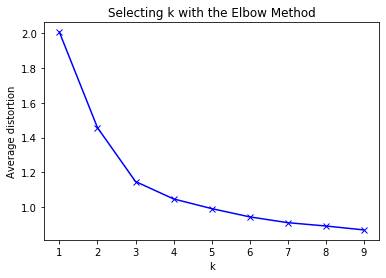

In [23]:
### ELBOW PLOT

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print(k,distortion)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [24]:
# K-MEANS WITH K = 3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(subset_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [25]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [26]:
centroid_df = pd.DataFrame(centroids, columns = subset_scaled_df.columns )

In [28]:
# CENTROIDS FOR DIFFERENT CLUSTERS
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [29]:
### AD LABELS

### CREATE COPY OF DATA
dataset=subset_scaled_df[:]

dataset['KmeansLabel']=kmeans.labels_

dataset.head(10)

/Users/Klari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KmeansLabel
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0


In [30]:
#### CLUSTER VIZUALISATION ####

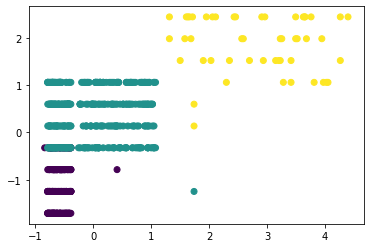

In [31]:
### SCATTERPLOTS
### 5 DIMENSIONS IN DATASET
### CREATE SCATTERPLOTS FROM 2 RANDOM FEATURES

plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_Credit_Cards'], c=kmeans.labels_,)  
plt.show()

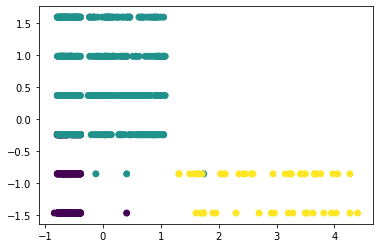

In [32]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_visits_bank'], c=kmeans.labels_,)  
plt.show()

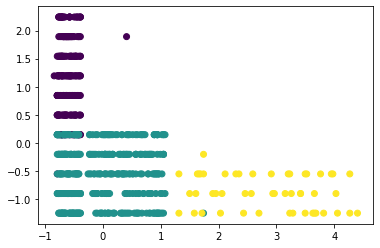

In [33]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_calls_made'], c=kmeans.labels_,)  
plt.show()

In [34]:
#### ANALYZE CLUSTERS ####

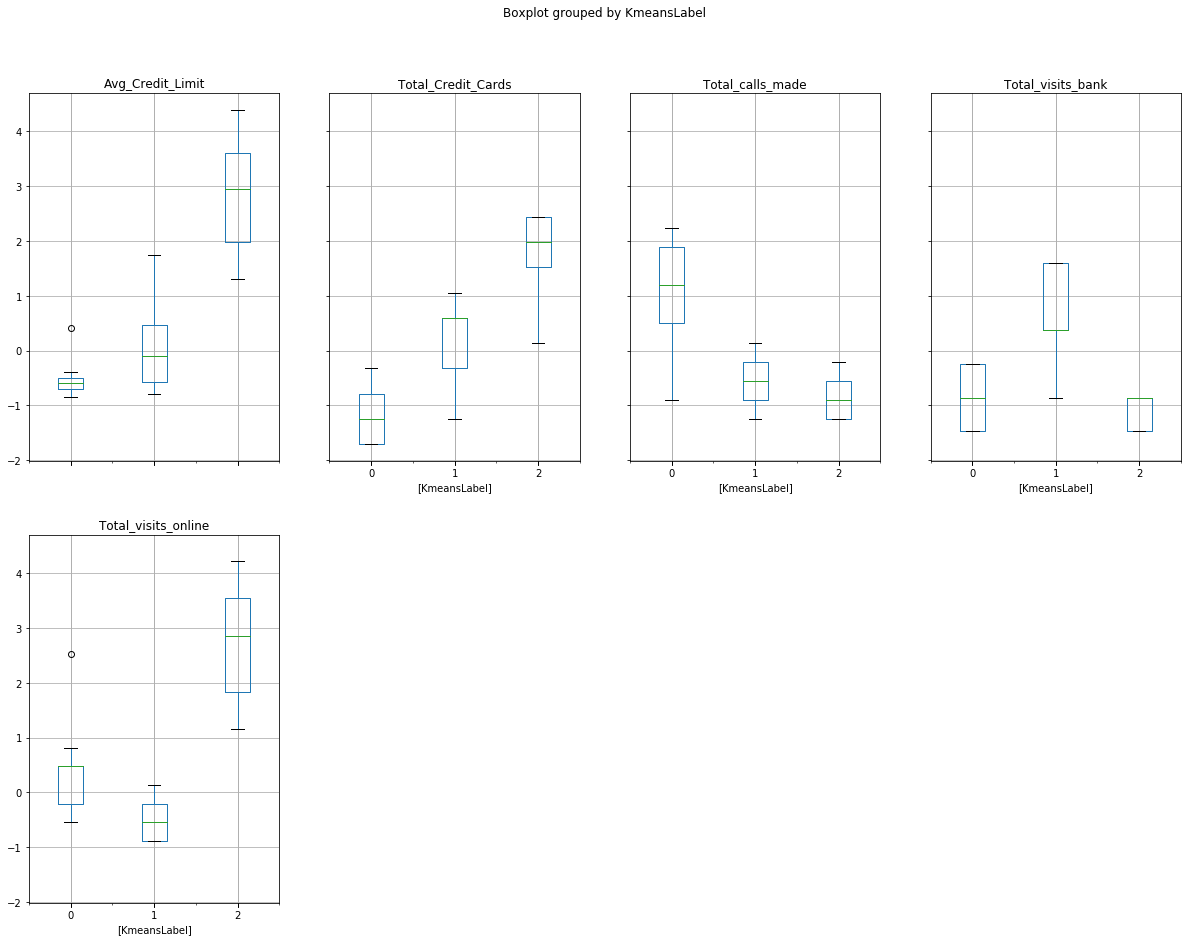

In [35]:
### BOXPLOTS TO OBSERVE STATISTICAL PROPERTIES

dataset.boxplot(by = 'KmeansLabel',  layout=(2,4), figsize=(20, 15))
plt.show()

In [36]:
# DIFFERENTIATED CLUSTERS OBSERVABLE

In [37]:
#### HIERARCHICAL CLUSTERING ####

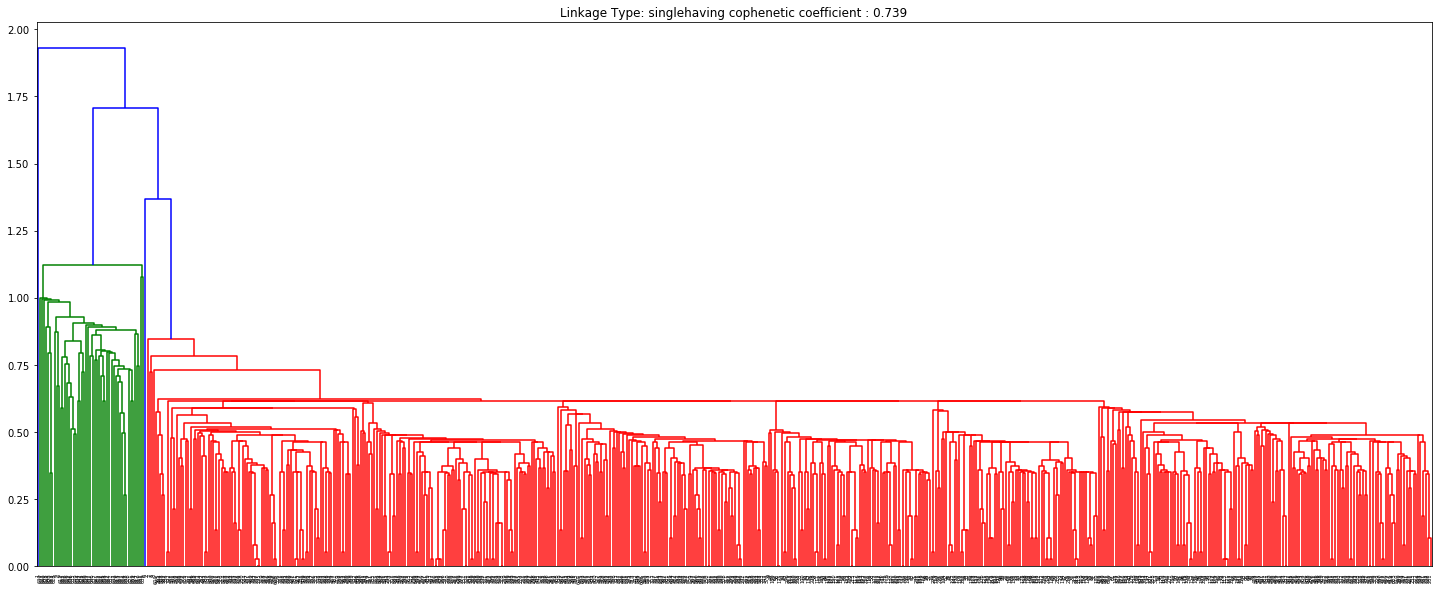

single 0.7391220243806552


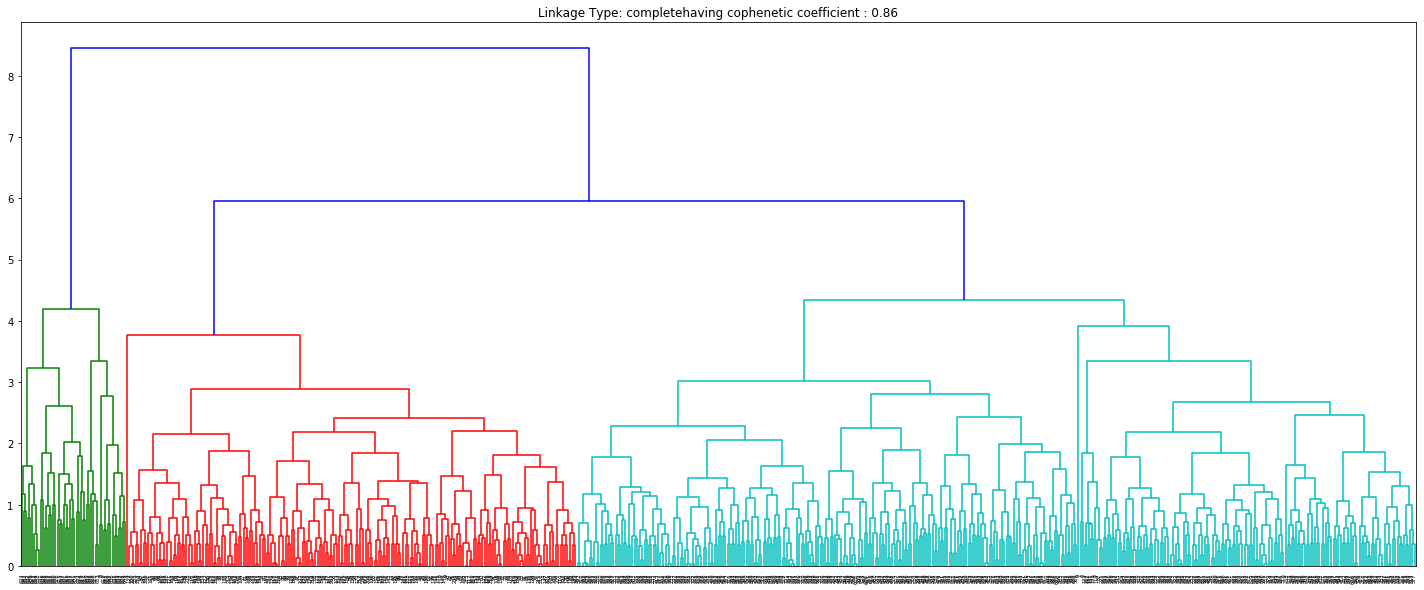

complete 0.8599730607972423


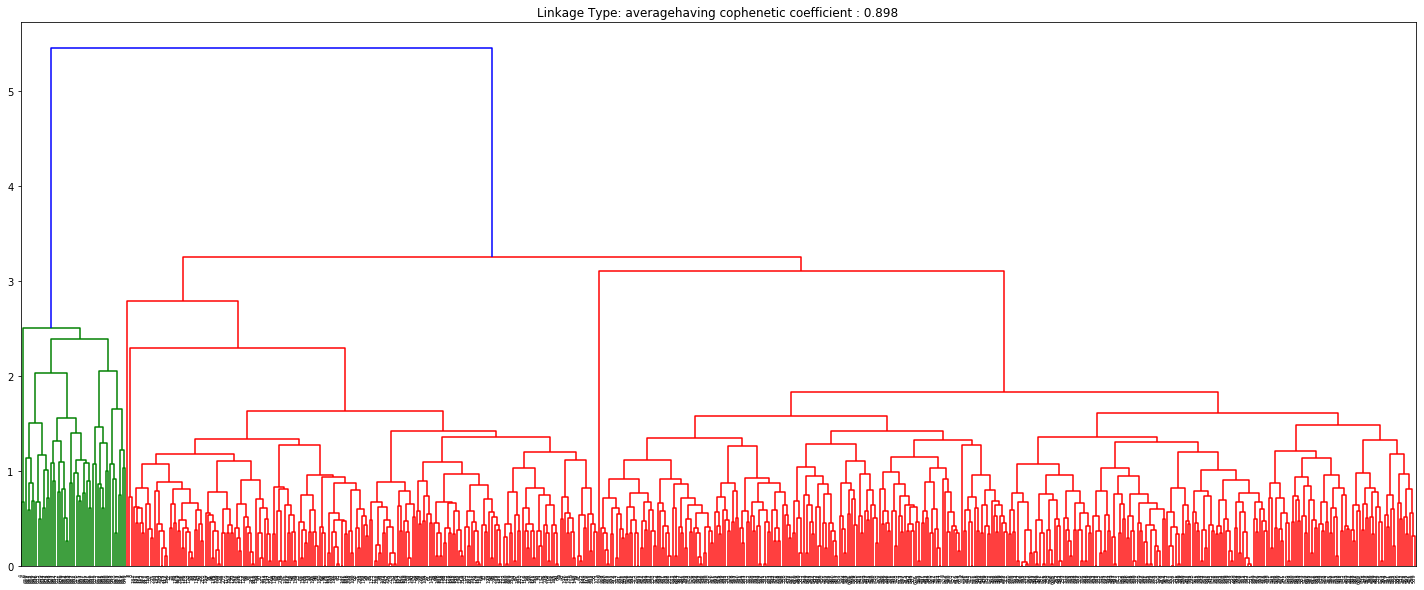

average 0.8977080867389372


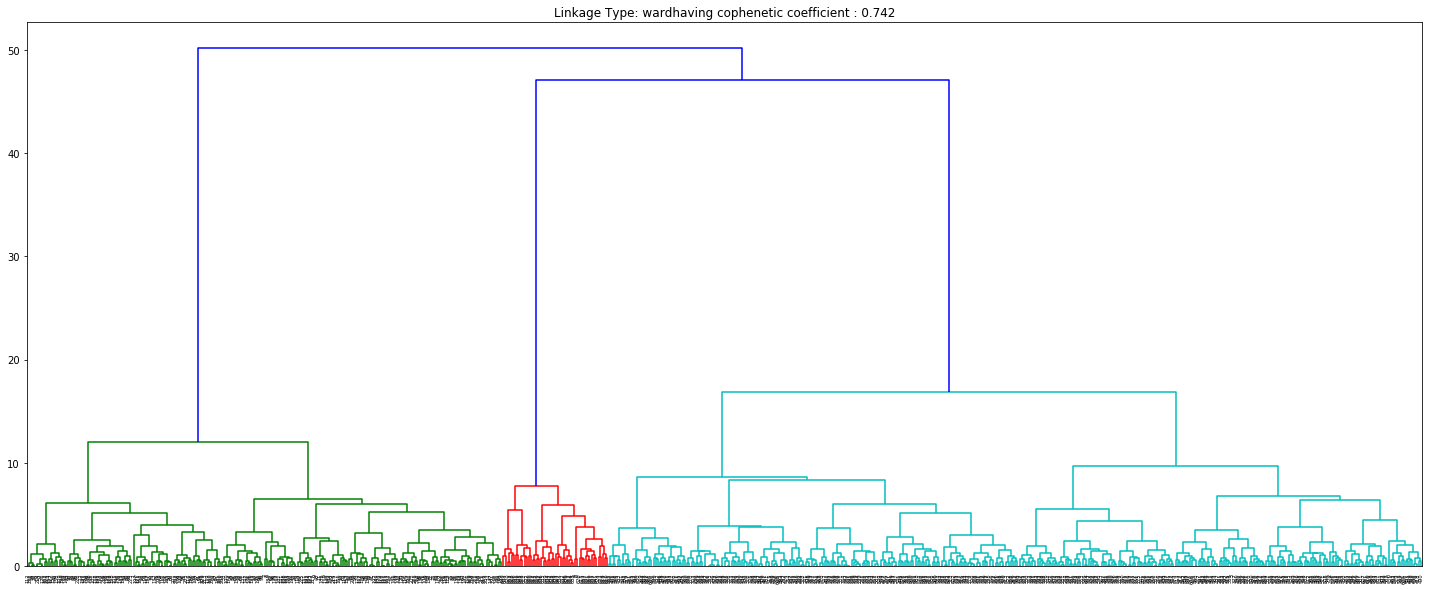

ward 0.7415156284827493


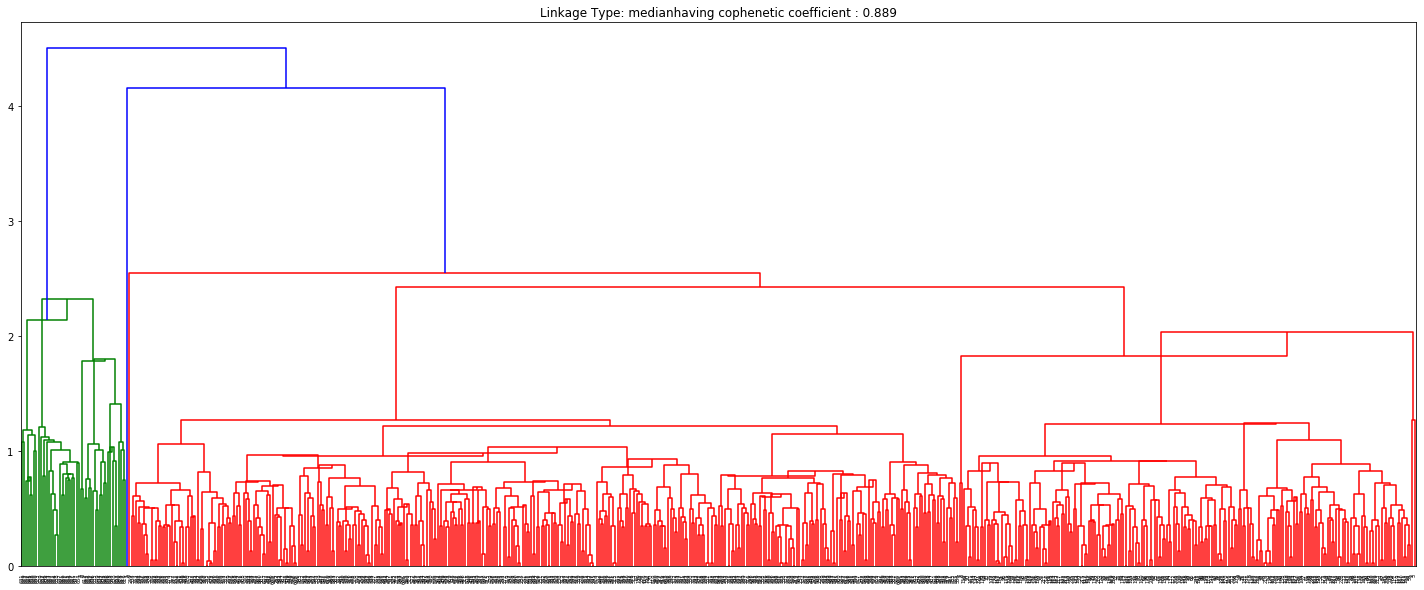

median 0.8893799537016724


In [38]:
### DENDOGRAMS
### COPHENETIC COEFFICIENT 

linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for each in linkage_methods :
    Z = linkage(subset_scaled_df, method=each, metric='euclidean')
    cc,cophn_dist=cophenet(Z,pdist(subset_scaled_df))
   
    #Plotting the dendogram 
    plt.figure(figsize=(25, 10))
    dendrogram(Z)
    plt.title("Linkage Type: "+each +"having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    
    results_cophenetic_coef.append((each,cc))
    print (each,cc)

In [39]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,ward,0.741516
4,median,0.889380


In [40]:
# 'AVERAGE' LINKAGE YIELDS BEST RESULT

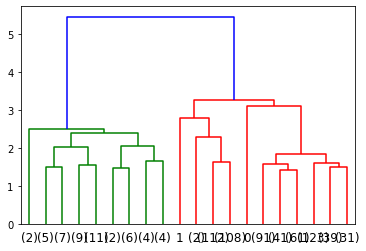

In [41]:
### DENDOGRAM FOR LAST 20 FORMED CLUSTERS
### TRUNCATE_MODE: 'lastp'

Z = linkage(subset_scaled_df, 'average', metric='euclidean')

dendrogram(
    Z,
    truncate_mode='lastp',  
    p=20
)
plt.show()

In [42]:
### MAX DISTANCE: 3.2 
### MAX DISTANCE 3.2 TO FORM DIFFERENT CLUSTERS

max_d=3.2
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [43]:
set(clusters)

{1, 2, 3}

In [44]:
# 3 CLUSTERS FORMED

In [45]:
#### CLUSTERS LABEL TO DATA SET ####

In [46]:
### COPY OF DATASET
dataset2=subset_scaled_df[:]

dataset2['HierarchicalClusteringLabel']=clusters

dataset2.head(3)

/Users/Klari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HierarchicalClusteringLabel
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,3


In [47]:
#### ANALYZE CLUSTERS ####

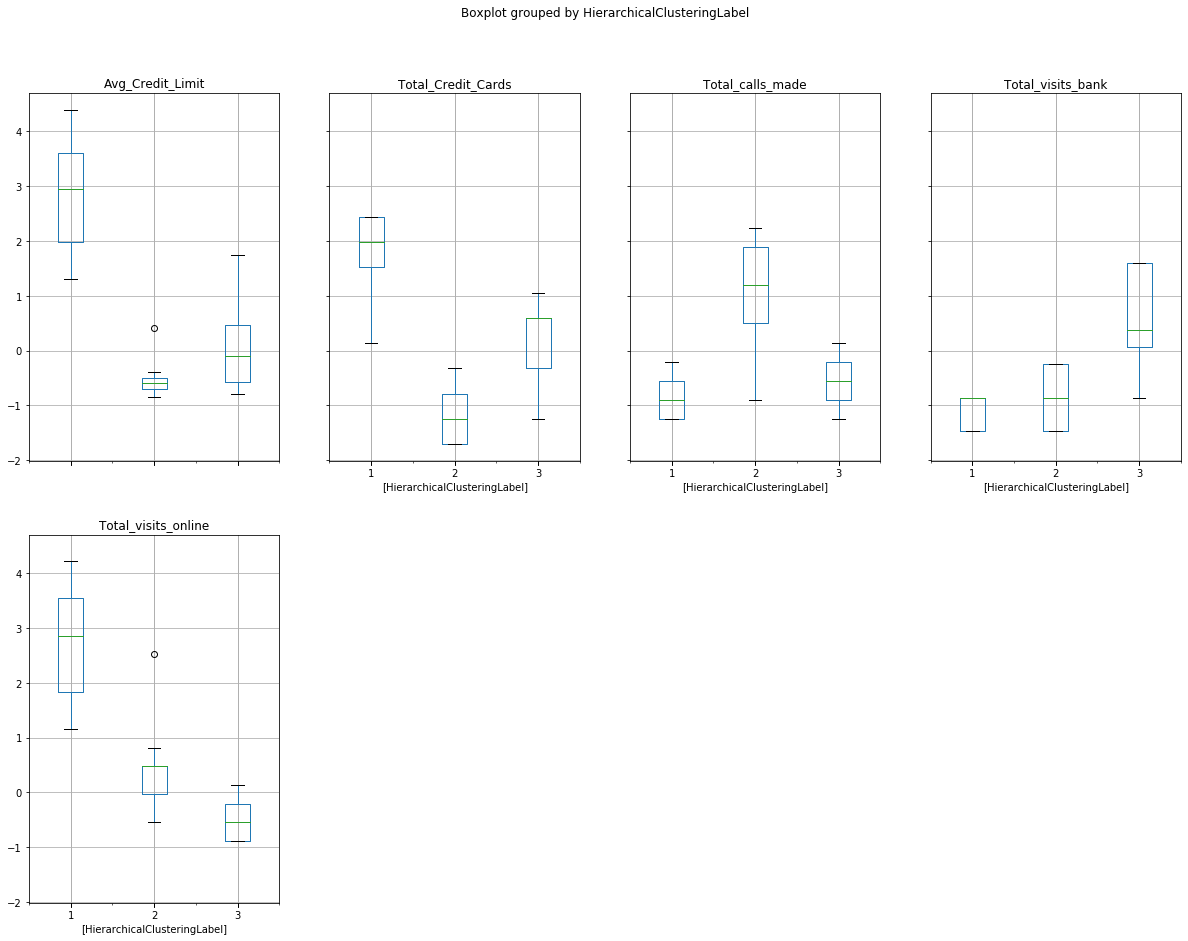

In [48]:
dataset2.boxplot(by = 'HierarchicalClusteringLabel',  layout=(2,4), figsize=(20, 15))
plt.show()

In [49]:
#### K-MEANS VS HIERARCHICAL RESULTS ####

In [50]:
Kmeans_results=dataset.groupby('KmeansLabel').mean()
Kmeans_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KmeansLabel,,,,,
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [51]:
Hierarchical_results=dataset2.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HierarchicalClusteringLabel,,,,,
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605
3,-0.022902,0.371882,0.664034,-0.552775,-0.551200


In [52]:
# SIMILARITIES:
    # * CLSTR 0 OF KM & CLSTR 2 OF H --> RENAME AS G1
    # * CLSTR 1 OF KM & CLSTR 3 OF H --> RENAME AS G2
    # * CLSTR 2 OF KM & CLSTR 1 OF H --> RENAME AS G3

In [53]:
Kmeans_results.index=['G1','G2','G3']
Kmeans_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
G1,-0.595796,-1.059623,-0.901518,0.322997,1.148109
G2,-0.021062,0.373690,0.666395,-0.553672,-0.553005
G3,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [54]:
Hierarchical_results.index=['G3','G1','G2']
Hierarchical_results.sort_index(inplace=True)
Hierarchical_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
G1,-0.595179,-1.062913,-0.904453,0.325372,1.152605
G2,-0.022902,0.371882,0.664034,-0.552775,-0.551200
G3,2.831764,1.862226,-1.105763,2.827319,-0.874330


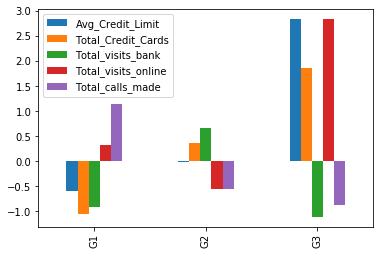

In [55]:
Kmeans_results.plot.bar()

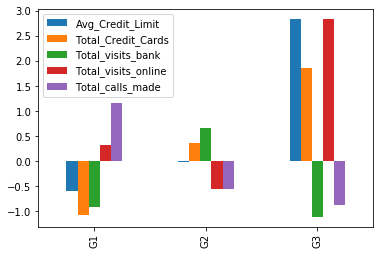

In [56]:
Hierarchical_results.plot.bar()

In [57]:
#### MARKETING RECOMMENDATION & CLUSTER PROFILES ####

In [58]:
# BOTH CLUSTERING METHODS PROVIDED SIMILAR CLUSTERS
# LABELS CAN BE ASSIGNED FROM EITHER ALGORITHM TO UNSCALED ORIGINAL DATA

In [59]:
subset['KmeansLabel']=dataset['KmeansLabel']

/Users/Klari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
for each in cols_to_consider:
    print (each)
    print ( subset.groupby('KmeansLabel').describe().round()[each][['count','mean','min','max']])
    
    print ("\n\n")

Avg_Credit_Limit
             count      mean      min       max
KmeansLabel                                    
0            224.0   12174.0   3000.0   50000.0
1            386.0   33782.0   5000.0  100000.0
2             50.0  141040.0  84000.0  200000.0



Total_Credit_Cards
             count  mean  min   max
KmeansLabel                        
0            224.0   2.0  1.0   4.0
1            386.0   6.0  2.0   7.0
2             50.0   9.0  5.0  10.0



Total_visits_bank
             count  mean  min  max
KmeansLabel                       
0            224.0   1.0  0.0  2.0
1            386.0   3.0  1.0  5.0
2             50.0   1.0  0.0  1.0



Total_visits_online
             count  mean  min   max
KmeansLabel                        
0            224.0   4.0  1.0  10.0
1            386.0   1.0  0.0   3.0
2             50.0  11.0  6.0  15.0



Total_calls_made
             count  mean  min   max
KmeansLabel                        
0            224.0   7.0  1.0  10.0
1            3